In [ ]:
'''
Grammar Analysis

    Possibly compare to other accounts (or on English grammar dataset)
        Try to figure out what their first language is.
        
    % of posts and comments at subreddit, maybe per account per subreddit
        Where they are posting and commenting
        
    Some similarity between post/comment content and karma (upvotes/downvotes)
        What posts gained traction
        
    If more than x upvotes, some type of analysis, similarity
        Search for any claims of where they are from.
        
    Possibly use findings to try and detect unknown suspicious accounts
'''

In [1]:
import numpy as np
import csv
import pandas as pd
import nltk
from matplotlib import pyplot as plt

%matplotlib inline

dataframe_comments = pd.read_csv('reddit-suspicious-accounts/data/comments.csv', encoding='utf-8')

#Dataframe with occurance of str "I agree with you"
df_agree_with = dataframe_comments[dataframe_comments['body'].str.contains("I agree with you")].copy()

#Dataframe with occurance of str "police"
df_police = dataframe_comments[dataframe_comments['body'].str.contains("police")].copy()

'''df_police print statements'''
print(len(df_police))

for itr in df_police.index.values:
    print('itr: ', itr)
    print(df_police['body'][itr])

'''df_agree_with print statements'''
# print(len(df_agree_with))

# for itr in df_agree_with.index.values:
#     print('itr: ', itr)
#     print(df_agree_with['body'][itr])

#print(dataframe_comments['body'][0])
#dataframe_comments.head()

87
itr:  4
https://petitions.whitehouse.gov//petition/petition-create-nationwide-elected-and-publicly-reviewed-police-oversight-agency
itr:  418
What do you think about the investigation of black teenagers` deaths: Michael Brown and Tamir Rice? What should we do to stop police brutality against black minority? 

itr:  480
Crazy long story so I'll try to summarize it.

I read a few sections of Craigslist nearly daily and read about a dog that was lost and the owner was pleading with everyone everyday to keep an eye out for her beloved doggy and updating with sightings and the sort. This went on for maybe two weeks. You could tell she loved the dog and was really heartbroken; I felt awful for her.

Then it seems the dog is found / rescued but the "finders" refuse to return the dog to the owner. This just kills the owner and she doesn't know where the dog is being kept / where these people live...etc. She continues to post about it on Craigslist begging these people to return her dog.

We

'df_agree_with print statements'

In [2]:
#Tokenizes Comments for Sentiment analysis
tokenized_comments = []
for itr in dataframe_comments.index.values:
    tokenized_comments.append(nltk.word_tokenize(dataframe_comments['body'][itr], language = 'English', preserve_line = 'True'))

print(len(tokenized_comments))

6711


In [3]:
#Comments Containing the words Russia or russian
russia_reference = []
russian_reference = []
for itr in tokenized_comments:
    for num in range(0, len(itr)):
        if itr[num] == 'Russia' or itr[num] == 'russia': 
            russia_reference.append(itr)
        if itr[num] == 'Russian' or itr[num] == 'russian':
            russian_reference.append(itr)

print(len(russia_reference))
print(len(russian_reference))

41
40


In [4]:
#New dataframe with controveriality > 0 printing comments
controversial_comments = dataframe_comments.query('controversiality > 0').copy()

controversial_comments.head()

,fullname,archived,author.name,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_url,name,num_comments,parent_id,permalink,score,stickied,subreddit.display_name_prefixed,subreddit_type,ups
5,t1_d509t9i,True,BlackToLive,NaN,"By submitting to an independent, non-profit co...",1,1.467742e+09,NaN,0,False,...,http://blacktolive.org/?p=9589,t1_d509t9i,7,t1_d508xpp,/r/politics/comments/4rdu5x/hillarys_war_on_bl...,0,False,r/politics,public,0
10,t1_crya21g,True,FaurnFlamebreaker,NaN,"Well, in this country it's either you are top ...",1,1.433665e+09,NaN,0,False,...,http://www.npr.org/2015/06/06/412314705/jury-a...,t1_crya21g,287,t3_38v84b,/r/worldnews/comments/38v84b/jury_acquits_exbp...,0,False,r/worldnews,public,0
11,t1_cry9m2s,True,FaurnFlamebreaker,NaN,> large-scale military exercises near Russia\r...,1,1.433664e+09,NaN,0,False,...,http://freebeacon.com/national-security/stratc...,t1_cry9m2s,30,t3_38vt0w,/r/worldnews/comments/38vt0w/stratcom_deploys_...,-6,False,r/worldnews,public,-6
37,t1_cv3psup,True,Clawisma,NaN,That's the best I have seen today!\r\ncrying w...,1,1.442426e+09,NaN,0,False,...,http://i.imgur.com/mAbIDsm.gifv,t1_cv3psup,2129,t3_3l64el,/r/aww/comments/3l64el/wife_surprises_him_for_...,1,False,r/aww,public,1
93,t1_dsije4z,False,picnicshirt,NaN,This is a pro-BitcoinCash article hosted on bi...,1,1.515670e+09,NaN,0,False,...,https://news.bitcoin.com/miami-bitcoin-confere...,t1_dsije4z,47,t3_7pigps,/r/Buttcoin/comments/7pigps/miami_bitcoin_conf...,-2,False,r/Buttcoin,public,-2


In [5]:
dataframe_submissions = pd.read_csv('reddit-suspicious-accounts/data/submissions.csv', encoding='utf-8')
dataframe_submissions.head()

,fullname,archived,author.name,author_flair_text,brand_safe,created_utc,distinguished,domain,downs,edited,...,selftext,spoiler,stickied,subreddit_name_prefixed,subreddit_type,subreddit_subscribers,title,ups,url,whitelist_status
0,t3_8b7ryg,False,reddit,NaN,False,1.523369e+09,admin,self.reddit,0,False,...,NaN,False,False,u/reddit,user,0,This account is banned and is temporarily pres...,325,https://www.reddit.com/r/u_reddit/comments/8b7...,NaN
1,t3_511r3a,True,BlackToLive,NaN,False,1.472951e+09,NaN,twitter.com,0,False,...,NaN,False,False,r/Bad_Cop_No_Donut,public,125644,Cops really be trying hard to take non-black p...,1,https://twitter.com/gloed_up/status/7707843365...,promo_adult
2,t3_4xyikx,True,BlackToLive,NaN,True,1.471337e+09,NaN,abcnews.go.com,0,False,...,NaN,False,False,r/news,public,15884252,Milwaukee Police Chief: Some Arrests Made but ...,1,http://abcnews.go.com/US/wireStory/latest-poli...,all_ads
3,t3_4va15u,True,BlackToLive,NaN,False,1.469844e+09,NaN,blacktolive.org,0,False,...,NaN,False,False,r/BlackLivesMatter,public,6676,We Want Real Equality,1,http://blacktolive.org/opinion/we-want-real-eq...,promo_all
4,t3_4v9u9s,True,BlackToLive,NaN,False,1.469841e+09,NaN,blacktolive.org,0,False,...,NaN,False,False,r/Bad_Cop_No_Donut,public,125644,Three Remaining Cops In The Freddie Gray Case ...,1,http://blacktolive.org/news/crime/three-remain...,promo_adult


In [6]:
dataframe_users = pd.read_csv('reddit-suspicious-accounts/data/users.csv', encoding='utf-8')
dataframe_users.head()

,fullname,comment_karma,created_utc,has_subscribed,has_verified_email,icon_img,id,is_employee,is_gold,is_mod,link_karma,name
0,t2_z919g,-7,1.467681e+09,True,True,https://www.redditstatic.com/avatars/avatar_de...,z919g,False,False,False,1,BlackToLive
1,t2_nhk4d,-5,1.431683e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhk4d,False,False,False,1,FaurnFlamebreaker
2,t2_r8rca,-4,1.445054e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,r8rca,False,False,False,1,Bill_Jonson
3,t2_nhml3,0,1.431694e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhml3,False,False,False,1,PurebringerOghmagra
4,t2_qidqv,-2,1.442424e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,qidqv,False,False,False,1,Clawisma


In [7]:
'''Analyze upvoted comments'''

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string

stopwords = stopwords.words('english') #Insignificant word filter

#aiming to remove inflectional endings only and to return the base or dictionary form of a word
lemmatizer = WordNetLemmatizer() #Lemmatizer instance

upvoted_comments = dataframe_comments.query('ups >= 50').copy() #Gather comments with (50) or more upvotes
tokenized_comments = [] #Tokenized comments

#Tokenize each comment
for itr in upvoted_comments.index.values:
    lowercased = upvoted_comments['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments)):
    for w in range(0, len(tokenized_comments[index])):
        tokenized_comments[index][w] = lemmatizer.lemmatize(tokenized_comments[index][w])
        
#Filter out insignificant words
for i in range(0, len(tokenized_comments)):
    tokenized_comments[i] = [word for word in tokenized_comments[i] if word not in stopwords]

#Find counts of all words
c = Counter()
for lyst in tokenized_comments:
    for werd in lyst:
        c[werd] += 1
    
print(c)
print(c.most_common(10))

'''
Need to: compare most common words for all comments and downvoted comments.
Find Subreddits that posts were most popular in
Possibly some sort of clustering
'''


Counter({'one': 7, 'terrorist': 7, 'get': 6, 'make': 5, 'like': 5, 'people': 5, 'american': 4, 'wa': 4, 'dont': 4, 'bitcoin': 4, 'time': 4, 'could': 4, 'u': 4, 'even': 4, 'every': 3, 'want': 3, '1': 3, 'never': 3, 'account': 3, 'life': 3, 'next': 3, 'child': 3, 'well': 3, 'think': 3, 'muslim': 3, 'christian': 3, 'way': 3, 'post': 3, 'know': 3, 'cost': 2, 'thats': 2, 'actually': 2, 'feel': 2, 'casting': 2, 'two': 2, 'last': 2, 'movie': 2, 'friend': 2, 'food': 2, '000': 2, 'whats': 2, 'statement': 2, 'r': 2, 'create': 2, 'idea': 2, 'say': 2, 'ill': 2, 'roy': 2, 'moore': 2, 'good': 2, 'isnt': 2, 'meant': 2, 'obama': 2, 'trump': 2, 'call': 2, 'said': 2, 'america': 2, 'attack': 2, 'hall': 2, 'school': 2, 'fix': 2, 'cash': 2, 'old': 2, 'end': 2, 'russian': 2, 'hope': 2, 'killed': 2, 'illness': 2, 'doctor': 2, 'limited': 2, 'supply': 2, 'steal': 2, 'bf': 2, 'unfaithful': 2, 'bye': 2, 'funeral': 1, 'buried': 1, 'healthcare': 1, 'beef': 1, 'jerky': 1, 'delicious': 1, 'generally': 1, 'prohibitiv

'\nNeed to: compare most common words for all comments and downvoted comments.\nFind Subreddits that posts were most popular in\nPossibly some sort of clustering\n'

In [39]:
#Sentiment Analysis of Comments Using Vader
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from collections import Counter
import string

sia = SIA()
comments_list = []
for itr in dataframe_comments.index.values:
    comments_list.append(dataframe_comments['body'][itr])

positive_results = []
neutral_results = []
negative_results = []
compound_results = []
for itr in comments_list:
    pol_score = sia.polarity_scores(itr)
    positive_results.append(pol_score['pos'])
    neutral_results.append(pol_score['neu'])
    negative_results.append(pol_score['neg'])
    compound_results.append(pol_score['compound'])
    #results.append(pol_score)

#df1 = DataFrame({'polarity_score': results})
df1 = pd.DataFrame({'polarity_score_positive': positive_results})
df2 = pd.DataFrame({'polarity_score_neutral': neutral_results})
df3 = pd.DataFrame({'polarity_score_negative': negative_results})
df4 = pd.DataFrame({'polarity_score_compound': compound_results})

#Added Polarity Scores to dataframe_comments
dataframe_comments['polarity_score_positive'] = df1
dataframe_comments['polarity_score_neutral'] = df2
dataframe_comments['polarity_score_negative'] = df3
dataframe_comments['polarity_score_compound'] = df4

#pos_max = dataframe_comments['polarity_score_positive'].max()
pos_mean = dataframe_comments['polarity_score_positive'].mean()
neu_mean = dataframe_comments['polarity_score_neutral'].mean()
#neg_max = dataframe_comments['polarity_score_negative'].max()
neg_mean = dataframe_comments['polarity_score_negative'].mean()
compound_mean = dataframe_comments['polarity_score_compound'].mean()

for itr in positive_results:
    print('itr: ', itr)
    print(positive_results[int(itr)])

print('pos_mean = ', pos_mean, 'neu_mean = ', neu_mean, 'neg_mean = ', neg_mean, 'compound_mean = ', compound_mean) 
print('pos_mean - neg_mean = ', pos_mean - neg_mean)
dataframe_comments.head()
#print(dataframe_comments['polarity_score'])

itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.113
0.0
itr:  0.0
0.0
itr:  0.153
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.122
0.0
itr:  0.062
0.0
itr:  0.318
0.0
itr:  0.235
0.0
itr:  0.272
0.0
itr:  0.418
0.0
itr:  0.762
0.0
itr:  0.469
0.0
itr:  0.277
0.0
itr:  0.0
0.0
itr:  0.693
0.0
itr:  0.727
0.0
itr:  0.636
0.0
itr:  0.423
0.0
itr:  0.0
0.0
itr:  0.258
0.0
itr:  0.333
0.0
itr:  0.0
0.0
itr:  0.373
0.0
itr:  0.464
0.0
itr:  0.431
0.0
itr:  0.0
0.0
itr:  0.258
0.0
itr:  0.0
0.0
itr:  0.585
0.0
itr:  0.482
0.0
itr:  0.507
0.0
itr:  0.301
0.0
itr:  0.39
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.064
0.0
itr:  0.286
0.0
itr:  0.091
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.099
0.0
itr:  0.272
0.0
itr:  0.239
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.697
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.198
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.12
0.0
itr:  0.

itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.508
0.0
itr:  0.0
0.0
itr:  0.467
0.0
itr:  0.382
0.0
itr:  0.225
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.244
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.054
0.0
itr:  0.154
0.0
itr:  0.0
0.0
itr:  0.092
0.0
itr:  0.134
0.0
itr:  0.133
0.0
itr:  0.089
0.0
itr:  0.053
0.0
itr:  0.056
0.0
itr:  0.188
0.0
itr:  0.084
0.0
itr:  0.108
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.136
0.0
itr:  0.0
0.0
itr:  0.096
0.0
itr:  0.183
0.0
itr:  0.275
0.0
itr:  0.198
0.0
itr:  0.25
0.0
itr:  0.11
0.0
itr:  0.159
0.0
itr:  0.0
0.0
itr:  0.085
0.0
itr:  0.032
0.0
itr:  0.0
0.0
itr:  0.013
0.0
itr:  0.138
0.0
itr:  0.0
0.0
itr:  0.049
0.0
itr:  0.0
0.0
itr:  0.173
0.0
itr:  0.204
0.0
itr:  0.078
0.0
itr:  0.0
0.0
itr:  0.114
0.0
itr:  0.157
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.182
0.0
itr:  0.082
0.0
itr:  0.101
0.0
itr:  0.071
0.0
itr:  0.06
0.0
itr:  0.127
0.0
itr:  0.172
0.0
itr:  0.119
0.0
itr:  0.0
0.0
itr:  0.0

0.0
itr:  0.118
0.0
itr:  0.091
0.0
itr:  0.485
0.0
itr:  0.726
0.0
itr:  0.119
0.0
itr:  0.0
0.0
itr:  0.083
0.0
itr:  0.168
0.0
itr:  0.166
0.0
itr:  0.184
0.0
itr:  0.0
0.0
itr:  0.133
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.167
0.0
itr:  0.0
0.0
itr:  0.322
0.0
itr:  0.153
0.0
itr:  0.718
0.0
itr:  0.119
0.0
itr:  0.0
0.0
itr:  0.234
0.0
itr:  0.0
0.0
itr:  0.082
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.217
0.0
itr:  0.541
0.0
itr:  0.355
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.318
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.886
0.0
itr:  0.761
0.0
itr:  0.0
0.0
itr:  0.156
0.0
itr:  0.209
0.0
itr:  0.217
0.0
itr:  0.367
0.0
itr:  0.0
0.0
itr:  0.408
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.626
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.293
0.0
itr:  0.481
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.389
0.0
itr:  0.0
0.0
itr:  0.126
0.0
itr:  0.0
0.0
itr:  0.271
0.0
itr:  0.0
0.0
itr:  0.252
0.0
itr:  0.221
0.0
itr:  0.123
0.0
itr:  0.0
0.0
itr:  0.286
0.0
itr:  0.16

itr:  0.0
0.0
itr:  0.086
0.0
itr:  0.0
0.0
itr:  0.3
0.0
itr:  0.506
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.36
0.0
itr:  0.363
0.0
itr:  0.0
0.0
itr:  0.371
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.265
0.0
itr:  0.0
0.0
itr:  0.726
0.0
itr:  0.294
0.0
itr:  0.235
0.0
itr:  0.0
0.0
itr:  0.306
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.251
0.0
itr:  0.479
0.0
itr:  0.141
0.0
itr:  0.487
0.0
itr:  0.351
0.0
itr:  0.0
0.0
itr:  0.18
0.0
itr:  0.0
0.0
itr:  0.527
0.0
itr:  0.252
0.0
itr:  0.0
0.0
itr:  0.399
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.188
0.0
itr:  0.205
0.0
itr:  0.0
0.0
itr:  0.185
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.165
0.0
itr:  0.103
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.105
0.0
itr:  0.222
0.0
itr:  0.459
0.0
itr:  0.592
0.0
itr:  0.625
0.0
itr:  0.209
0.0
itr:  0.117
0.0
itr:  0.238
0.0
itr:  0.185
0.0
itr:  0.196
0.0
itr:  0.193
0.0
itr:  0.375
0.0
itr:  0.102
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.26
0.0
itr:  0.134
0.0
itr:  0.0
0.0
i

itr:  0.232
0.0
itr:  0.317
0.0
itr:  0.231
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.558
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.094
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.15
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.112
0.0
itr:  0.46
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.316
0.0
itr:  0.529
0.0
itr:  0.0
0.0
itr:  1.0
0.0
itr:  1.0
0.0
itr:  0.714
0.0
itr:  0.039
0.0
itr:  0.108
0.0
itr:  0.208
0.0
itr:  0.186
0.0
itr:  0.0
0.0
itr:  0.068
0.0
itr:  0.0
0.0
itr:  0.647
0.0
itr:  0.0
0.0
itr:  0.364
0.0
itr:  0.0
0.0
itr:  0.53
0.0
itr:  0.0
0.0
itr:  0.289
0.0
itr:  0.0
0.0
itr:  0.365
0.0
itr:  0.0
0.0
itr:  0.067
0.0
itr:  0.218
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.238
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.127
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.058
0.0
itr:  0.318
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.075

itr:  0.246
0.0
itr:  0.428
0.0
itr:  0.0
0.0
itr:  0.3
0.0
itr:  0.574
0.0
itr:  0.242
0.0
itr:  0.722
0.0
itr:  0.0
0.0
itr:  0.348
0.0
itr:  0.0
0.0
itr:  0.404
0.0
itr:  0.444
0.0
itr:  0.0
0.0
itr:  0.172
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.193
0.0
itr:  0.085
0.0
itr:  0.0
0.0
itr:  0.152
0.0
itr:  0.344
0.0
itr:  0.272
0.0
itr:  0.0
0.0
itr:  0.259
0.0
itr:  0.264
0.0
itr:  0.0
0.0
itr:  0.194
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.225
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.242
0.0
itr:  0.559
0.0
itr:  0.285
0.0
itr:  0.0
0.0
itr:  0.304
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.232
0.0
itr:  0.0
0.0
itr:  0.205
0.0
itr:  0.0
0.0
itr:  0.22
0.0
itr:  0.154
0.0
itr:  0.177
0.0
itr:  0.0
0.0
itr:  0.118
0.0
itr:  0.0
0.0
itr:  0.171
0.0
itr:  0.137
0.0
itr:  0.313
0.0
itr:  0.0
0.0
itr:  0.333
0.0
itr:  0.166
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.195
0.0
itr:  1.0
0.0
itr:  0.0
0.0
itr:  0.0

itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.266
0.0
itr:  0.128
0.0
itr:  0.287
0.0
itr:  0.677
0.0
itr:  0.256
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.174
0.0
itr:  0.047
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.135
0.0
itr:  0.189
0.0
itr:  0.2
0.0
itr:  0.07
0.0
itr:  0.037
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.11
0.0
itr:  0.085
0.0
itr:  0.118
0.0
itr:  0.154
0.0
itr:  0.0
0.0
itr:  0.299
0.0
itr:  0.0
0.0
itr:  0.264
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.666
0.0
itr:  0.263
0.0
itr:  0.349
0.0
itr:  0.0
0.0
itr:  0.069
0.0
itr:  0.217
0.0
itr:  0.059
0.0
itr:  0.168
0.0
itr:  0.0
0.0
itr:  0.043
0.0
itr:  0.0
0.0
itr:  1.0
0.0
itr:  0.168
0.0
itr:  0.226
0.0
itr:  0.102
0.0
itr:  0.268
0.0
itr:  0.0
0.0
itr:  0.138
0.0
itr:  0.087
0.0
itr:  0.0
0.0
itr:  0.121
0.0
itr:  0.149
0.0
itr:  0.145
0.0
itr:  0.07
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.314
0.0
itr:  1.0
0.0
itr:  0.161
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr: 

itr:  0.0
0.0
itr:  1.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.264
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.632
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.292
0.0
itr:  0.0
0.0
itr:  0.157
0.0
itr:  0.0
0.0
itr:  0.607
0.0
itr:  0.569
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.257
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.583
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.555
0.0
itr:  0.283
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.343
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.093
0.0
itr:  0.548
0.0
itr:  0.464
0.0
itr:  0.0
0.0
itr:  0.386
0.0
itr:  0.0
0.0
itr:  0.81
0.0
itr:  0.825
0.0
itr:  0.829
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.668
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  0.0
0.0
itr:  1.0
0.0
itr:  0.0
0.0
itr:  0.569
0.0
itr:  0.0
0.0
itr:  0.737
0.0
itr:  0

,fullname,archived,author.name,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,score,stickied,subreddit.display_name_prefixed,subreddit_type,ups,polarity_score_positive,polarity_score_neutral,polarity_score_negative,polarity_score_compound,label
0,t1_d687zh5,True,BlackToLive,NaN,"A hard look at training and tactics"" = They wi...",0,1.470604e+09,NaN,0,False,...,1,False,r/Bad_Cop_No_Donut,public,1,0.000,0.903,0.097,-0.1027,-1
1,t1_d5wqzhx,True,BlackToLive,NaN,They deserve all of the hate,0,1.469847e+09,NaN,0,False,...,1,False,r/Bad_Cop_No_Donut,public,1,0.000,0.575,0.425,-0.5719,-1
2,t1_d5qvqfw,True,BlackToLive,NaN,"I guess that's what they mean when say ""I don'...",0,1.469498e+09,NaN,0,False,...,1,False,r/Bad_Cop_No_Donut,public,1,0.000,1.000,0.000,0.0000,0
3,t1_d5quz9y,True,BlackToLive,NaN,"It's never too late for them, It's never too c...",0,1.469497e+09,NaN,0,False,...,1,False,r/Bad_Cop_No_Donut,public,1,0.113,0.736,0.151,-0.2565,-1
4,t1_d565ls1,True,BlackToLive,NaN,https://petitions.whitehouse.gov//petition/pet...,0,1.468114e+09,NaN,0,False,...,1,False,r/Good_Cop_Free_Donut,public,1,0.000,1.000,0.000,0.0000,0


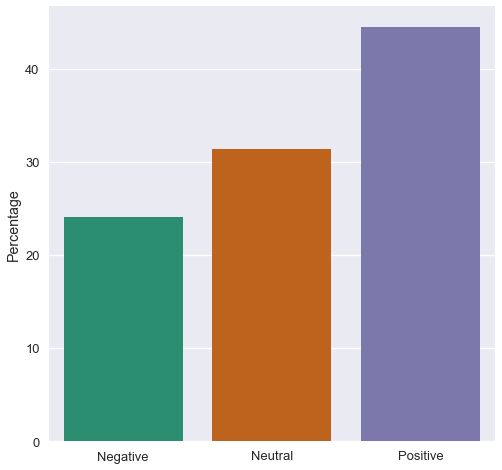

In [11]:
#Graph Pos, Neu, Neg Polarity Scores
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#Add Labels for Neg, Pos, and Neutral Polarity Scores
dataframe_comments['label'] = 0
dataframe_comments.loc[dataframe_comments['polarity_score_compound'] > 0.1, 'label'] = 1
dataframe_comments.loc[dataframe_comments['polarity_score_compound'] < -0.1, 'label'] = -1
dataframe_comments.head()

fig, ax = plt.subplots(figsize=(8, 8))

counts = dataframe_comments.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

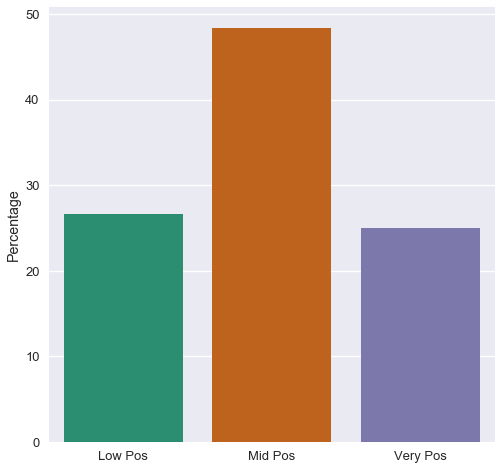

In [26]:
#Graph Pos Polarity Score Distribution
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#Dataframe Containing all positive
df_positive_comments = dataframe_comments.query('label == 1').copy()

#Add Labels for Pos Polarity Scores
# low = -1, mid = 0, high = 1
#df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]
df_positive_comments['how_pos'] = 0
df_positive_comments.loc[df_positive_comments['polarity_score_compound'] < 0.4, 'how_pos'] = -1
df_positive_comments.loc[(df_positive_comments['polarity_score_compound'] > 0.7) & (df_positive_comments['polarity_score_compound'] <= 1), 'how_pos'] = 1
df_positive_comments.head()

fig, ax = plt.subplots(figsize=(8, 8))

counts = df_positive_comments.how_pos.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Low Pos', 'Mid Pos', 'Very Pos'])
ax.set_ylabel("Percentage")

plt.show()

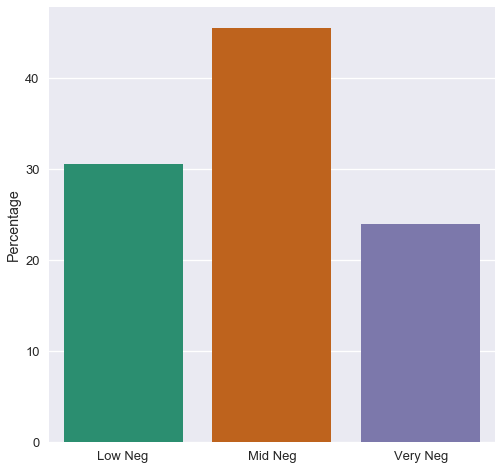

In [33]:
#Graph Pos Polarity Score Distribution
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#Dataframe Containing all positive
df_negative_comments = dataframe_comments.query('label == -1').copy()

#Add Labels for Pos Polarity Scores
# low neg = -1, mid neg = 0, high neg = 1
#df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]
df_negative_comments['how_neg'] = 0
df_negative_comments.loc[df_negative_comments['polarity_score_compound'] > -0.4, 'how_neg'] = -1
df_negative_comments.loc[(df_negative_comments['polarity_score_compound'] < -0.7) & (df_negative_comments['polarity_score_compound'] >= -1), 'how_neg'] = 1 
df_negative_comments.head()

# df_negative_comments['how_neg'] = 0
# df_negative_comments.loc[df_negative_comments['polarity_score_compound'] < 0.4, 'how_neg'] = -1
# df_negative_comments.loc[(df_negative_comments['polarity_score_compound'] > 0.7) & (df_negative_comments['polarity_score_compound'] >= -1), 'how_neg'] = 1
# df_negative_comments.head()

fig, ax = plt.subplots(figsize=(8, 8))

counts = df_negative_comments.how_neg.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Low Neg', 'Mid Neg', 'Very Neg'])
ax.set_ylabel("Percentage")

plt.show()

pos_mean =  1.0 neu_mean =  0.7289067203099368 neg_mean =  0.08977484726568317 compound_mean =  0.11452387125614642
pos_mean - neg_mean =  0.910225152734


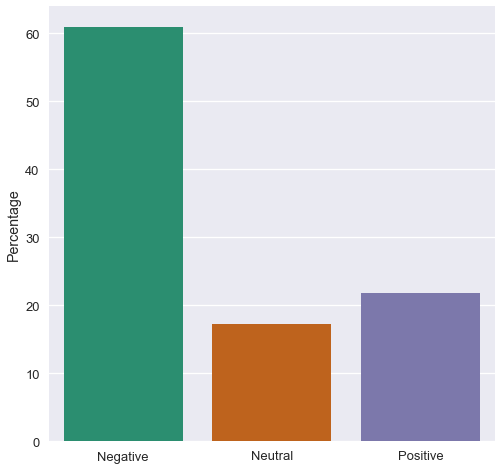

In [16]:
#Graph Pos, Neu, Neg Polarity Scores - Sentiment Analysis of Dataframe with Comments Containing String of "police"

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#Add Labels for Neg, Pos, and Neutral Polarity Scores
df_police['label'] = 0
df_police.loc[dataframe_comments['polarity_score_compound'] > 0.1, 'label'] = 1
df_police.loc[dataframe_comments['polarity_score_compound'] < -0.1, 'label'] = -1
#df_police.head()

pos_mean = dataframe_comments['polarity_score_positive'].mean()
neu_mean = dataframe_comments['polarity_score_neutral'].mean()
neg_mean = dataframe_comments['polarity_score_negative'].mean()
compound_mean = dataframe_comments['polarity_score_compound'].mean()

print('pos_mean = ', pos_mean, 'neu_mean = ', neu_mean, 'neg_mean = ', neg_mean, 'compound_mean = ', compound_mean) 
print('pos_mean - neg_mean = ', pos_mean - neg_mean)

fig, ax = plt.subplots(figsize=(8, 8))

counts = df_police.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

pos_mean =  0.175505438831769 neu_mean =  0.7289067203099368 neg_mean =  0.08977484726568317 compound_mean =  0.11452387125614642
pos_mean - neg_mean =  0.08573059156608583


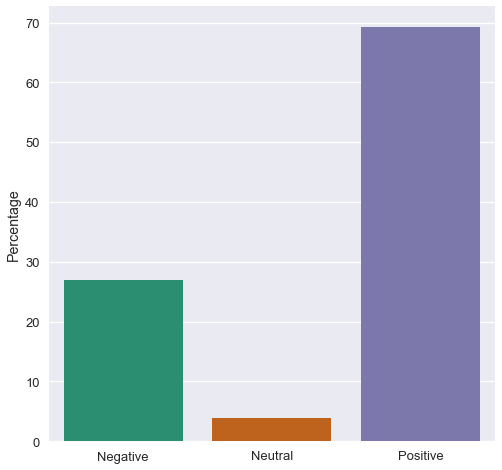

In [15]:
#Graph Pos, Neu, Neg Polarity Scores - Sentiment Analysis of Dataframe with Comments Containing String of "police"

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#Add Labels for Neg, Pos, and Neutral Polarity Scores
df_agree_with['label'] = 0
df_agree_with.loc[dataframe_comments['polarity_score_compound'] > 0.1, 'label'] = 1
df_agree_with.loc[dataframe_comments['polarity_score_compound'] < -0.1, 'label'] = -1
#df_police.head()

pos_mean = dataframe_comments['polarity_score_positive'].mean()
neu_mean = dataframe_comments['polarity_score_neutral'].mean()
neg_mean = dataframe_comments['polarity_score_negative'].mean()
compound_mean = dataframe_comments['polarity_score_compound'].mean()

print('pos_mean = ', pos_mean, 'neu_mean = ', neu_mean, 'neg_mean = ', neg_mean, 'compound_mean = ', compound_mean) 
print('pos_mean - neg_mean = ', pos_mean - neg_mean)

fig, ax = plt.subplots(figsize=(8, 8))

counts = df_agree_with.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [156]:
'''Seach for Common Phrases in Comments Using Ngrams'''

stopwords = stopwords.words('english') #Insignificant word filter

#aiming to remove inflectional endings only and to return the base or dictionary form of a word
lemmatizer = WordNetLemmatizer() #Lemmatizer instance

#All Comments Tokenized
tokenized_comments_all = []

#Tokenize each comment
for itr in dataframe_comments.index.values:
    lowercased = dataframe_comments['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments_all.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments_all)):
    for w in range(0, len(tokenized_comments_all[index])):
        tokenized_comments_all[index][w] = lemmatizer.lemmatize(tokenized_comments_all[index][w])


#Create n-grams of num_tokens_to_gram tokens
num_tokens_to_gram = 4

n_gram_tokens_all = []

for num in range(0, len(tokenized_comments_all)):
    n_gram_tokens = ngrams(tokenized_comments_all[num], num_tokens_to_gram)
    n_gram_tokens_all.append(n_gram_tokens)
#     if num < 10:
#        print(Counter(n_gram_tokens))

#Find counts of identical tokens
c = Counter()
for lyst in n_gram_tokens_all:
    for gram in lyst:
        c[gram] += 1
    
#print(c)
print(c.most_common(100))

# print(n_gram_3_tokens_all)

[(('ethan', 'bradberry', 'ethan', 'bradberry'), 54), (('bradberry', 'ethan', 'bradberry', 'ethan'), 53), (('f', 'u', 'c', 'k'), 40), (('u', 'c', 'k', 'm'), 40), (('c', 'k', 'm', 'u'), 40), (('k', 'm', 'u', 's'), 40), (('m', 'u', 's', 'l'), 40), (('u', 's', 'l', 'i'), 40), (('s', 'l', 'i', 'm'), 40), (('l', 'i', 'm', 's'), 40), (('retarded', 'faggot', 'retarded', 'faggot'), 40), (('i', 'm', 's', 'f'), 39), (('m', 's', 'f', 'u'), 39), (('s', 'f', 'u', 'c'), 39), (('faggot', 'retarded', 'faggot', 'retarded'), 39), (('i', 'agree', 'with', 'you'), 27), (('is', 'one', 'of', 'the'), 15), (('at', 'the', 'same', 'time'), 13), (('a', 'lot', 'of', 'people'), 13), (('in', 'the', 'first', 'place'), 12), (('i', 'would', 'like', 'to'), 11), (('the', 'rest', 'of', 'the'), 10), (('the', 'end', 'of', 'the'), 9), (('one', 'of', 'the', 'most'), 9), (('a', 'close', 'eye', 'on'), 9), (('i', 'am', 'not', 'a'), 9), (('for', 'a', 'long', 'time'), 8), (('what', 'do', 'you', 'think'), 8), (('i', 'would', 'recomm

C:\Users\jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: generator 'ngrams' raised StopIteration


In [145]:
'''Seach for Common Phrases in Comments Using Ngrams - Negative Polarity Score'''
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from collections import Counter
import string
from pprint import pprint

stopwords = stopwords.words('english') #Insignificant word filter

#aiming to remove inflectional endings only and to return the base or dictionary form of a word
lemmatizer = WordNetLemmatizer() #Lemmatizer instance

#All Comments Tokenized
#controversial_comments = dataframe_comments.query('controversiality > 0').copy()
comments_neg_polarity_score = dataframe_comments.query('label == -1').copy()

tokenized_comments_neg_polarity_score = []

#Tokenize each comment
for itr in comments_neg_polarity_score.index.values:
#     print(itr)
#     print(comments_neg_polarity_score['body'][itr])
    lowercased = comments_neg_polarity_score['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments_neg_polarity_score.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments_neg_polarity_score)):
    for w in range(0, len(tokenized_comments_neg_polarity_score[index])):
        tokenized_comments_neg_polarity_score[index][w] = lemmatizer.lemmatize(tokenized_comments_neg_polarity_score[index][w])


#Create n-grams of num_tokens_to_gram tokens
num_tokens_to_gram = 6

n_gram_tokens_all = []

for num in range(0, len(tokenized_comments_neg_polarity_score)):
    n_gram_tokens = ngrams(tokenized_comments_neg_polarity_score[num], num_tokens_to_gram)
    n_gram_tokens_all.append(n_gram_tokens)
#     if num < 10:
#        print(Counter(n_gram_tokens))

#Find counts of identical tokens
c = Counter()
for lyst in n_gram_tokens_all:
    for gram in lyst:
        c[gram] += 1
    
#print(c)
print(c.most_common(100))

# print(n_gram_3_tokens_all)

[(('retarded', 'faggot', 'retarded', 'faggot', 'retarded', 'faggot'), 39), (('faggot', 'retarded', 'faggot', 'retarded', 'faggot', 'retarded'), 38), (('37yearold', 'alton', 'sterling', 'a', 'father', 'of'), 3), (('alton', 'sterling', 'a', 'father', 'of', 'five'), 3), (('cop', 'pulled', 'his', 'gun', 'pointed', 'it'), 3), (('pulled', 'his', 'gun', 'pointed', 'it', 'on'), 3), (('his', 'gun', 'pointed', 'it', 'on', 'the'), 3), (('gun', 'pointed', 'it', 'on', 'the', 'man'), 3), (('pointed', 'it', 'on', 'the', 'man', '’'), 3), (('it', 'on', 'the', 'man', '’', 's'), 3), (('on', 'the', 'man', '’', 's', 'chest'), 3), (('the', 'man', '’', 's', 'chest', 'and'), 3), (('man', '’', 's', 'chest', 'and', 'fired'), 3), (('’', 's', 'chest', 'and', 'fired', 'multiple'), 3), (('s', 'chest', 'and', 'fired', 'multiple', 'shot'), 3), (('the', 'incident', 'said', 'that', 'sterling', 'wasn'), 3), (('incident', 'said', 'that', 'sterling', 'wasn', '’'), 3), (('said', 'that', 'sterling', 'wasn', '’', 't'), 3), (

C:\Users\jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: generator 'ngrams' raised StopIteration


In [152]:
'''Seach for Common Phrases in Comments Using Ngrams - Positive Polarity Score'''
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from collections import Counter
import string
from pprint import pprint

stopwords = stopwords.words('english') #Insignificant word filter

#aiming to remove inflectional endings only and to return the base or dictionary form of a word
lemmatizer = WordNetLemmatizer() #Lemmatizer instance

#All Comments Tokenized
#controversial_comments = dataframe_comments.query('controversiality > 0').copy()
comments_pos_polarity_score = dataframe_comments.query('label == 1').copy()

tokenized_comments_pos_polarity_score = []

#Tokenize each comment
for itr in comments_pos_polarity_score.index.values:
#     print(itr)
#     print(comments_pos_polarity_score['body'][itr])
    lowercased = comments_pos_polarity_score['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments_pos_polarity_score.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments_pos_polarity_score)):
    for w in range(0, len(tokenized_comments_pos_polarity_score[index])):
        tokenized_comments_pos_polarity_score[index][w] = lemmatizer.lemmatize(tokenized_comments_pos_polarity_score[index][w])


#Create n-grams of num_tokens_to_gram tokens
num_tokens_to_gram = 4

n_gram_tokens_all = []

for num in range(0, len(tokenized_comments_pos_polarity_score)):
    n_gram_tokens = ngrams(tokenized_comments_pos_polarity_score[num], num_tokens_to_gram)
    n_gram_tokens_all.append(n_gram_tokens)

#Find counts of identical tokens
c = Counter()
for lyst in n_gram_tokens_all:
    for gram in lyst:
        c[gram] += 1

#print(c)
print(c.most_common(100))
#print(n_gram_3_tokens_all)

[(('i', 'agree', 'with', 'you'), 19), (('is', 'one', 'of', 'the'), 11), (('a', 'close', 'eye', 'on'), 9), (('the', 'end', 'of', 'the'), 8), (('i', 'would', 'like', 'to'), 8), (('i', 'would', 'recommend', 'to'), 8), (('keep', 'a', 'close', 'eye'), 8), (('there', 'is', 'a', 'point'), 8), (('is', 'a', 'point', 'to'), 8), (('i', 'like', 'the', 'idea'), 8), (('one', 'of', 'the', 'best'), 7), (('one', 'of', 'the', 'most'), 7), (('go', 'to', 'the', 'moon'), 7), (('at', 'the', 'same', 'time'), 6), (('what', 'do', 'you', 'think'), 6), (('the', 'rest', 'of', 'the'), 6), (('ha', 'nothing', 'to', 'do'), 6), (('nothing', 'to', 'do', 'with'), 6), (('recommend', 'to', 'keep', 'a'), 6), (('to', 'keep', 'a', 'close'), 6), (('pay', 'more', 'attention', 'to'), 6), (('one', 'of', 'them', 'will'), 6), (('a', 'lot', 'of', 'people'), 6), (('thanks', 'for', 'posting', 'this'), 5), (('do', 'your', 'own', 'research'), 5), (('would', 'recommend', 'to', 'keep'), 5), (('to', 'pay', 'more', 'attention'), 5), (('of'

C:\Users\jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: generator 'ngrams' raised StopIteration


In [150]:
'''Seach for Common Phrases in Comments Using Ngrams - Neutral Polarity Score'''
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from collections import Counter
import string
from pprint import pprint

stopwords = stopwords.words('english') #Insignificant word filter

#aiming to remove inflectional endings only and to return the base or dictionary form of a word
lemmatizer = WordNetLemmatizer() #Lemmatizer instance

#All Comments Tokenized
#controversial_comments = dataframe_comments.query('controversiality > 0').copy()
comments_pos_polarity_score = dataframe_comments.query('label == 0').copy()

tokenized_comments_pos_polarity_score = []

#Tokenize each comment
for itr in comments_pos_polarity_score.index.values:
#     print(itr)
#     print(comments_pos_polarity_score['body'][itr])
    lowercased = comments_pos_polarity_score['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments_pos_polarity_score.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments_pos_polarity_score)):
    for w in range(0, len(tokenized_comments_pos_polarity_score[index])):
        tokenized_comments_pos_polarity_score[index][w] = lemmatizer.lemmatize(tokenized_comments_pos_polarity_score[index][w])


#Create n-grams of num_tokens_to_gram tokens
num_tokens_to_gram = 4

n_gram_tokens_all = []

for num in range(0, len(tokenized_comments_pos_polarity_score)):
    n_gram_tokens = ngrams(tokenized_comments_pos_polarity_score[num], num_tokens_to_gram)
    n_gram_tokens_all.append(n_gram_tokens)

#Find counts of identical tokens
c = Counter()
for lyst in n_gram_tokens_all:
    for gram in lyst:
        c[gram] += 1

#print(c)
print(c.most_common(100))
#print(n_gram_3_tokens_all)

[(('ethan', 'bradberry', 'ethan', 'bradberry'), 54), (('bradberry', 'ethan', 'bradberry', 'ethan'), 53), (('f', 'u', 'c', 'k'), 40), (('u', 'c', 'k', 'm'), 40), (('c', 'k', 'm', 'u'), 40), (('k', 'm', 'u', 's'), 40), (('m', 'u', 's', 'l'), 40), (('u', 's', 'l', 'i'), 40), (('s', 'l', 'i', 'm'), 40), (('l', 'i', 'm', 's'), 40), (('i', 'm', 's', 'f'), 39), (('m', 's', 'f', 'u'), 39), (('s', 'f', 'u', 'c'), 39), (('ay', 'yo', 'le', 'mao'), 5), (('for', 'a', 'long', 'time'), 4), (('a', 'lot', 'of', 'people'), 3), (('the', 'rest', 'of', 'the'), 3), (('is', 'going', 'to', 'be'), 3), (('a', 'long', 'a', 'the'), 3), (('ha', 'nothing', 'to', 'do'), 3), (('nothing', 'to', 'do', 'with'), 3), (('is', 'one', 'of', 'the'), 3), (('am', 'i', 'the', 'only'), 3), (('at', 'the', 'same', 'time'), 3), (('i', 'know', 'that', 'feel'), 3), (('a', 'normal', 'day', 'in'), 3), (('this', 'wa', 'a', 'very'), 2), (('wa', 'a', 'very', 'well'), 2), (('a', 'very', 'well', 'directed'), 2), (('very', 'well', 'directed',

C:\Users\jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: generator 'ngrams' raised StopIteration
